<a href="https://colab.research.google.com/github/zoraizmohammad/optics-modern-notebook/blob/main/lab3-blackbody/BaslerRaw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
import math
import matplotlib.pyplot as plt


def BaslerRAW(file_name):
    # Read raw data from file
    data = np.fromfile(file_name, dtype=np.uint8)
    image_data = data.reshape((1024, 1280))

    # Define Bayer pattern tiles
    red_tile = np.array([[0, 0], [0, 1]], dtype=np.bool_)
    green_tile_1 = np.array([[0, 1], [0, 0]], dtype=np.bool_)
    green_tile_2 = np.array([[0, 0], [1, 0]], dtype=np.bool_)
    blue_tile = np.array([[1, 0], [0, 0]], dtype=np.bool_)

    # Create index arrays for each color channel
    red_index_array = np.tile(red_tile, (512, 640))
    green_index_array_1 = np.tile(green_tile_1, (512, 640))
    green_index_array_2 = np.tile(green_tile_2, (512, 640))
    blue_index_array = np.tile(blue_tile, (512, 640))

    # Extract color channels
    red_layer = image_data[red_index_array].reshape((512, 640))
    green_layer_1 = image_data[green_index_array_1].reshape((512, 640))
    green_layer_2 = image_data[green_index_array_2].reshape((512, 640))
    blue_layer = image_data[blue_index_array].reshape((512, 640))

    # Combine channels into a single image
    image = np.empty([512, 640, 3], np.uint8)
    image[:, :, 0] = red_layer
    image[:, :, 1] = ((green_layer_1.astype('d') + green_layer_2.astype('d')) / 2).astype('B')
    image[:, :, 2] = blue_layer

    return image

In [9]:
import numpy as np
import os
import math
import matplotlib.pyplot as plt


def BaslerRAWavg(file_name):
    # Read raw data from file
    data = np.fromfile(file_name, dtype=np.uint8)
    image_data = data.reshape((1024, 1280))

    # Define Bayer pattern tiles
    red_tile = np.array([[0, 0], [0, 1]], dtype=np.bool_)
    green_tile_1 = np.array([[0, 1], [0, 0]], dtype=np.bool_)
    green_tile_2 = np.array([[0, 0], [1, 0]], dtype=np.bool_)
    blue_tile = np.array([[1, 0], [0, 0]], dtype=np.bool_)

    # Create index arrays for each color channel
    red_index_array = np.tile(red_tile, (512, 640))
    green_index_array_1 = np.tile(green_tile_1, (512, 640))
    green_index_array_2 = np.tile(green_tile_2, (512, 640))
    blue_index_array = np.tile(blue_tile, (512, 640))

    # Extract color channels
    red_layer = image_data[red_index_array].reshape((512, 640))
    green_layer_1 = image_data[green_index_array_1].reshape((512, 640))
    green_layer_2 = image_data[green_index_array_2].reshape((512, 640))
    blue_layer = image_data[blue_index_array].reshape((512, 640))

    # Combine channels into a single image
    image = np.empty([512, 640, 3], np.uint8)
    image[:, :, 0] = red_layer
    image[:, :, 1] = ((green_layer_1.astype('d') + green_layer_2.astype('d')) / 2).astype('B')
    image[:, :, 2] = blue_layer

    # Calculate average values for each color channel
    avg_red = np.mean(red_layer)
    avg_green = np.mean((green_layer_1 + green_layer_2) / 2)
    avg_blue = np.mean(blue_layer)

    return (avg_red, avg_green, avg_blue)


##**Blue Lightbulb**

### Lightbulb On

array([[[ 34,   0, 150],
        [ 34,   0, 151],
        [ 34,   0, 151],
        ...,
        [ 33,   0, 147],
        [ 31,   0, 140],
        [ 33,   0, 146]],

       [[ 34,   0, 151],
        [ 33,   0, 148],
        [ 33,   0, 149],
        ...,
        [ 33,   0, 148],
        [ 32,   0, 143],
        [ 32,   0, 145]],

       [[ 34,   0, 151],
        [ 34,   0, 150],
        [ 33,   0, 150],
        ...,
        [ 31,   0, 139],
        [ 33,   0, 146],
        [ 33,   0, 148]],

       ...,

       [[ 31,   0, 139],
        [ 32,   0, 143],
        [ 31,   0, 137],
        ...,
        [ 34,   0, 153],
        [ 36,   0, 154],
        [ 36,   0, 154]],

       [[ 32,   0, 143],
        [ 33,   0, 147],
        [ 33,   0, 149],
        ...,
        [ 34,   0, 150],
        [ 33,   0, 146],
        [ 33,   0, 149]],

       [[ 34,   0, 151],
        [ 34,   0, 151],
        [ 37,   0, 158],
        ...,
        [ 33,   0, 150],
        [ 34,   0, 150],
        [ 36,   0, 155]]], dtype=uint8)
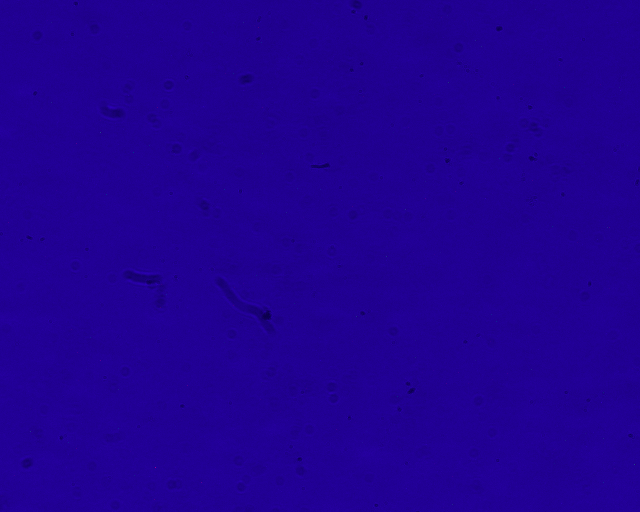

In [6]:
BaslerRAW('/content/drive/MyDrive/phy264/lab3info/labdata/blue200k147.raw')

In [10]:
BaslerRAWavg('/content/drive/MyDrive/phy264/lab3info/labdata/blue200k147.raw') #Blue Lightbulb On

(32.762759399414065, 0.0064788818359375, 146.54696960449218)

###Lightbulb Off

array([[[ 15,   0,  88],
        [ 15,   0,  89],
        [ 17,   0,  90],
        ...,
        [ 17,   0,  96],
        [ 15,   0,  90],
        [ 17,   0,  92]],

       [[ 15,   0,  91],
        [ 17,   0,  93],
        [ 19,   0,  92],
        ...,
        [ 19,   0, 100],
        [ 17,   0,  93],
        [ 15,   0,  92]],

       [[ 15,   0,  86],
        [ 17,   0,  94],
        [ 15,   0,  90],
        ...,
        [ 17,   0,  92],
        [ 17,   0,  91],
        [ 28,   0,  93]],

       ...,

       [[ 17,   0,  94],
        [ 17,   0,  96],
        [ 17,   0,  94],
        ...,
        [ 15,   0,  91],
        [ 17,   0,  93],
        [ 17,   0,  93]],

       [[ 15,   0,  90],
        [ 17,   0,  87],
        [ 17,   0,  94],
        ...,
        [ 17,   0,  96],
        [ 15,   0,  89],
        [ 15,   0,  89]],

       [[ 17,   0,  94],
        [ 17,   0,  92],
        [ 17,   0,  93],
        ...,
        [ 17,   0,  94],
        [ 15,   0,  92],
        [ 19,   0,  95]]], dtype=uint8)
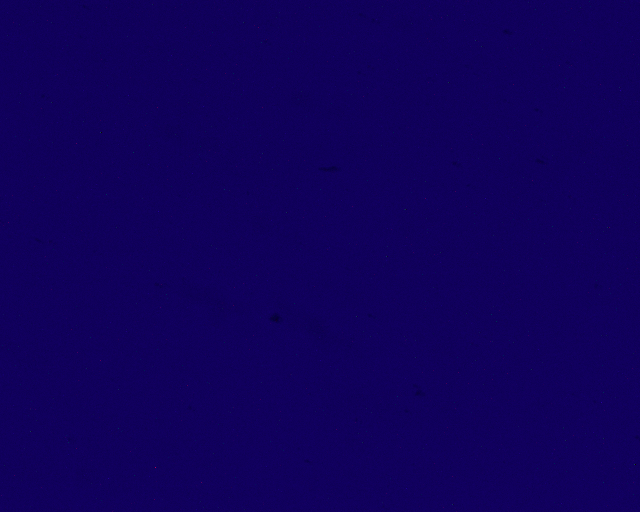

In [11]:
BaslerRAW('/content/drive/MyDrive/phy264/lab3info/labdata/blue200k76.raw')

In [12]:
BaslerRAWavg('/content/drive/MyDrive/phy264/lab3info/labdata/blue200k76.raw')

(16.075399780273436, 0.0289398193359375, 91.42368774414062)